# Perspectives in Computational Research: Homework 02

In [1]:
#Libraries
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import tensorflow 

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import text_to_word_sequence
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Activation, SimpleRNN
from keras.layers.embeddings import Embedding
from keras.layers import Flatten, Dense
from keras.layers.recurrent import LSTM
from keras.layers import GRU
from keras import losses
from keras import metrics

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.


### Load Data

In [2]:
# Train Data
train_data = pd.read_csv('data/congress_train.csv', encoding = "ISO-8859-1", engine='python', error_bad_lines=False)
train_data['Title'].apply(str)
train_title = train_data['Title'].tolist()
train_major = train_data['Major'].tolist()

# Validata Data
val_data = pd.read_csv('data/congress_val.csv', encoding = "ISO-8859-1", engine='python', error_bad_lines=False)
val_data['Title'].apply(str)
val_title = val_data['Title'].tolist()
val_major = val_data['Major'].tolist()

# Test Data
test_data = pd.read_csv('data/congress_test.csv', encoding = "ISO-8859-1", engine='python', error_bad_lines=False)
test_data['Title'].apply(str)
test_title = test_data['Title'].tolist()
test_major = test_data['Major'].tolist()

### Tokenize

In [3]:
token = Tokenizer(num_words=10000) #class restricting to 10000 words

In [4]:
# Train Data
token.fit_on_texts(train_title)
train_sequence = token.texts_to_sequences(train_title)
train_x = pad_sequences(train_sequence, maxlen=100)
train_y = to_categorical(train_major)

In [5]:
# validate Data
token.fit_on_texts(val_title)
val_sequence = token.texts_to_sequences(val_title)
val_x = pad_sequences(val_sequence, maxlen=100)
val_y = to_categorical(val_major)

In [6]:
# validate Data
token.fit_on_texts(test_title)
test_sequence = token.texts_to_sequences(test_title)
test_x = pad_sequences(test_sequence, maxlen=100)
test_y = to_categorical(test_major)

### Embedding
Reference: https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

In [7]:
#Parameters for Task Specific Embedding
vocab_size = 10000
pad_length = 100
em_space = 32

### Basic Feed Forward Network

In [8]:
# Define the model
basic_model = Sequential()
basic_model.add(Embedding(10000, em_space, input_length = 100))
basic_model.add(Flatten())
basic_model.add(Dense(24, activation='softmax'))

# Compile the model
basic_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

#Fit and Store Model Val
basic_metrics = basic_model.fit(train_x, train_y, epochs= 15, batch_size=1024,validation_data = (val_x, val_y))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 278612 samples, validate on 69649 samples
Epoch 1/15
278612/278612 [==============================] - 7s 26us/step - loss: 2.1258 - acc: 0.4130 - val_loss: 2.3143 - val_acc: 0.3339
Epoch 2/15
278612/278612 [==============================] - 7s 25us/step - loss: 1.0047 - acc: 0.7442 - val_loss: 2.4187 - val_acc: 0.3168
Epoch 3/15
278612/278612 [==============================] - 7s 26us/step - loss: 0.7151 - acc: 0.8088 - val_loss: 2.5862 - val_acc: 0.2948
Epoch 4/15
278612/278612 [==============================] - 7s 26us/step - loss: 0.6165 - acc: 0.8324 - val_loss: 2.7444 - val_acc: 0.2802
Epoch 5/15
278612/278612 [==============================] - 7s 26us/step - loss: 0.5618 - acc: 0.8461 - val_loss: 2.8440 - val_acc: 0.2707
Epoch 6/15
278612/278612 [==============================] - 7s 26us/step - loss: 0.5238 - acc: 0.8555 - val_loss: 2.9336 - val_acc: 0.

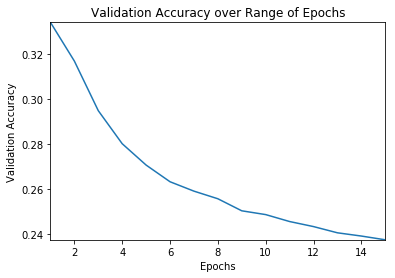

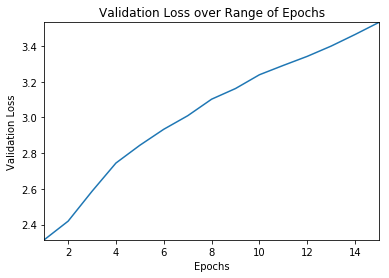

In [9]:
#Extract Accuracy and Loss from keras callback history
metrics = basic_metrics.history
val_accuracy = metrics['val_acc']
val_loss = metrics['val_loss']
epochs = numpy.arange(1, len(val_accuracy)+1)

#Plot Accuracy over Epochs
plt.clf()
plt.plot(epochs, val_accuracy)
plt.margins(0)
plt.title("Validation Accuracy over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Accuracy")
plt.show()

#Plot Loss over Epochs
plt.clf()
plt.plot(epochs, val_loss)
plt.margins(0)
plt.title("Validation Loss over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Loss")
plt.show()

### Recurrent Neural Network (RNN) with a layer_simple_rnn

In [10]:
# Define the model
rnn_simple = Sequential()
rnn_simple.add(Embedding(vocab_size, em_space, input_length=pad_length))
rnn_simple.add(SimpleRNN(em_space))
rnn_simple.add(Dense(24, activation='softmax'))

# Compile the model
rnn_simple.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

#Fit and Store Model Val
rnn_metrics = rnn_simple.fit(train_x, train_y, epochs= 15, batch_size= 1024, validation_data = (val_x, val_y))

Train on 278612 samples, validate on 69649 samples
Epoch 1/15
278612/278612 [==============================] - 29s 103us/step - loss: 2.4780 - acc: 0.2561 - val_loss: 2.9581 - val_acc: 0.1557
Epoch 2/15
278612/278612 [==============================] - 29s 102us/step - loss: 1.7140 - acc: 0.5073 - val_loss: 3.4240 - val_acc: 0.1875
Epoch 3/15
278612/278612 [==============================] - 29s 103us/step - loss: 1.3480 - acc: 0.6326 - val_loss: 3.6000 - val_acc: 0.1798
Epoch 4/15
278612/278612 [==============================] - 28s 102us/step - loss: 1.1187 - acc: 0.7060 - val_loss: 3.7752 - val_acc: 0.1822
Epoch 5/15
278612/278612 [==============================] - 28s 102us/step - loss: 0.9496 - acc: 0.7536 - val_loss: 3.9286 - val_acc: 0.1919
Epoch 6/15
278612/278612 [==============================] - 29s 102us/step - loss: 0.8504 - acc: 0.7804 - val_loss: 4.0047 - val_acc: 0.1842
Epoch 7/15
278612/278612 [==============================] - 28s 102us/step - loss: 0.7861 - acc: 0.7983

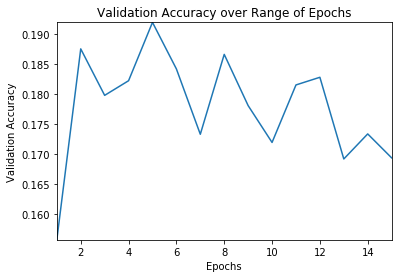

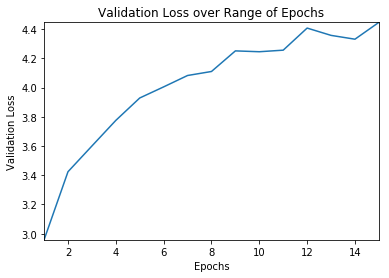

In [11]:
#Extract Accuracy and Loss from keras callback history
metrics = rnn_metrics.history
val_accuracy = metrics['val_acc']
val_loss = metrics['val_loss']
epochs = numpy.arange(1, len(val_accuracy)+1)

#Plot Accuracy over Epochs
plt.clf()
plt.plot(epochs, val_accuracy)
plt.margins(0)
plt.title("Validation Accuracy over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Accuracy")
plt.show()

#Plot Loss over Epochs
plt.clf()
plt.plot(epochs, val_loss)
plt.margins(0)
plt.title("Validation Loss over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Loss")
plt.show()

### Estimate RNN with an LSTM Layer

In [12]:
# Define the model
rnn_lstm = Sequential()
rnn_lstm.add(Embedding(vocab_size, em_space, input_length=pad_length))
rnn_lstm.add(LSTM(em_space))
rnn_lstm.add(Dense(24, activation='softmax'))

# Compile the model
rnn_lstm.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#Fit and Store Model Val
rnn_lstm_metrics = rnn_lstm.fit(train_x, train_y,  epochs=15, batch_size=1024, validation_data = (val_x, val_y))

Train on 278612 samples, validate on 69649 samples
Epoch 1/15
278612/278612 [==============================] - 94s 339us/step - loss: 2.4219 - acc: 0.2834 - val_loss: 2.7737 - val_acc: 0.1946
Epoch 2/15
278612/278612 [==============================] - 94s 337us/step - loss: 1.5678 - acc: 0.5737 - val_loss: 3.0817 - val_acc: 0.2277
Epoch 3/15
278612/278612 [==============================] - 94s 336us/step - loss: 1.1266 - acc: 0.7102 - val_loss: 3.3407 - val_acc: 0.2357
Epoch 4/15
278612/278612 [==============================] - 94s 336us/step - loss: 0.8870 - acc: 0.7796 - val_loss: 3.4281 - val_acc: 0.2427
Epoch 5/15
278612/278612 [==============================] - 94s 338us/step - loss: 0.7533 - acc: 0.8112 - val_loss: 3.7047 - val_acc: 0.2302
Epoch 6/15
278612/278612 [==============================] - 94s 336us/step - loss: 0.6716 - acc: 0.8287 - val_loss: 3.6502 - val_acc: 0.2325
Epoch 7/15
278612/278612 [==============================] - 93s 335us/step - loss: 0.6135 - acc: 0.8401

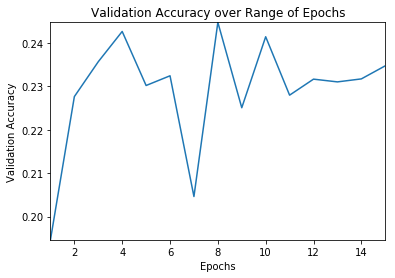

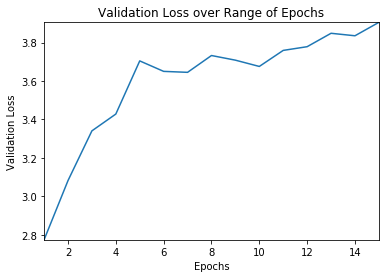

In [13]:
#Extract Accuracy and Loss from keras callback history
metrics = rnn_lstm_metrics.history
val_accuracy = metrics['val_acc']
val_loss = metrics['val_loss']
epochs = numpy.arange(1, len(val_accuracy)+1)

#Plot Accuracy over Epochs
plt.clf()
plt.plot(epochs, val_accuracy)
plt.margins(0)
plt.title("Validation Accuracy over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Accuracy")
plt.show()

#Plot Loss over Epochs
plt.clf()
plt.plot(epochs, val_loss)
plt.margins(0)
plt.title("Validation Loss over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Loss")
plt.show()

### Estimate RNN with GRU Layer

In [14]:
# Define the model
rnn_gru = Sequential()
rnn_gru.add(Embedding(vocab_size, em_space, input_length=pad_length))
rnn_gru.add(GRU(em_space))
rnn_gru.add(Dense(24, activation='softmax'))

# Compile the model
rnn_gru.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#Fit and Store Model Val
rnn_gru_metrics = rnn_gru.fit(train_x, train_y, epochs=15, batch_size=1024, validation_data = (val_x, val_y))

Train on 278612 samples, validate on 69649 samples
Epoch 1/15
278612/278612 [==============================] - 78s 281us/step - loss: 2.5930 - acc: 0.1956 - val_loss: 2.9247 - val_acc: 0.1502
Epoch 2/15
278612/278612 [==============================] - 77s 278us/step - loss: 2.0737 - acc: 0.3675 - val_loss: 3.1678 - val_acc: 0.1615
Epoch 3/15
278612/278612 [==============================] - 77s 278us/step - loss: 1.5479 - acc: 0.5630 - val_loss: 3.4503 - val_acc: 0.1851
Epoch 4/15
278612/278612 [==============================] - 78s 279us/step - loss: 1.0752 - acc: 0.7220 - val_loss: 3.7195 - val_acc: 0.1889
Epoch 5/15
278612/278612 [==============================] - 77s 278us/step - loss: 0.8606 - acc: 0.7856 - val_loss: 3.8422 - val_acc: 0.1965
Epoch 6/15
278612/278612 [==============================] - 77s 278us/step - loss: 0.7481 - acc: 0.8115 - val_loss: 3.8840 - val_acc: 0.1971
Epoch 7/15
278612/278612 [==============================] - 77s 278us/step - loss: 0.6761 - acc: 0.8264

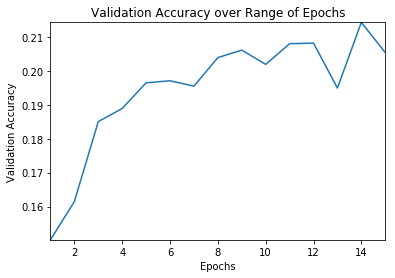

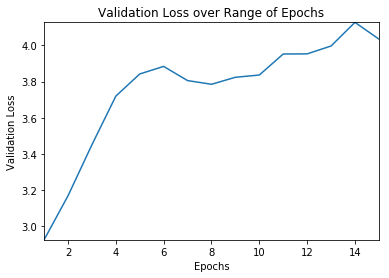

In [15]:
#Extract Accuracy and Loss from keras callback history
metrics = rnn_gru_metrics.history
val_accuracy = metrics['val_acc']
val_loss = metrics['val_loss']
epochs = numpy.arange(1, len(val_accuracy)+1)

#Plot Accuracy over Epochs
plt.clf()
plt.plot(epochs, val_accuracy)
plt.margins(0)
plt.title("Validation Accuracy over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Accuracy")
plt.show()

#Plot Loss over Epochs
plt.clf()
plt.plot(epochs, val_loss)
plt.margins(0)
plt.title("Validation Loss over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Loss")
plt.show()

### 5 Models to Tune

##### Model 1 - Add Dropout to LSTM Model

In [16]:
model_dropout = Sequential()
model_dropout.add(Embedding(vocab_size, em_space, input_length=pad_length))
model_dropout.add(LSTM(em_space,dropout=0.1,recurrent_dropout=0.5))
model_dropout.add(Dense(24, activation='softmax'))

model_dropout.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

model_dropout_metrics = model_dropout.fit(train_x, train_y, epochs=15, batch_size=1024, validation_data = (val_x, val_y))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 278612 samples, validate on 69649 samples
Epoch 1/15
278612/278612 [==============================] - 110s 394us/step - loss: 2.6222 - acc: 0.2150 - val_loss: 2.6264 - val_acc: 0.2273
Epoch 2/15
278612/278612 [==============================] - 108s 389us/step - loss: 1.6398 - acc: 0.5337 - val_loss: 2.9691 - val_acc: 0.2822
Epoch 3/15
278612/278612 [==============================] - 108s 389us/step - loss: 1.0266 - acc: 0.7356 - val_loss: 3.1954 - val_acc: 0.2750
Epoch 4/15
278612/278612 [==============================] - 108s 389us/step - loss: 0.7799 - acc: 0.7982 - val_loss: 3.3312 - val_acc: 0.2664
Epoch 5/15
278612/278612 [==============================] - 108s 389us/step - loss: 0.6662 - acc: 0.8238 - val_loss: 3.3673 - val_acc: 0.2649
Epoch 6/15
278612/278612 [==============================] - 109s 390us/step - loss: 0.6029 - acc: 0.8360 - val_loss: 3.4057 

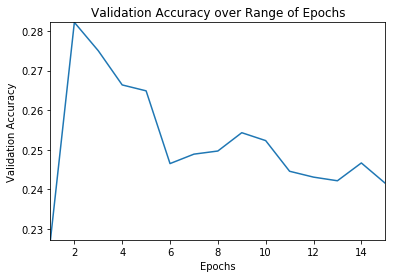

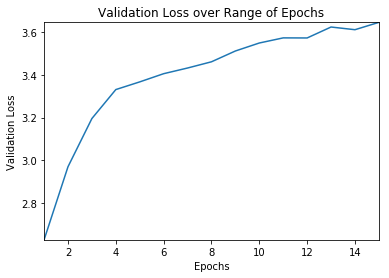

In [17]:
#Extract Accuracy and Loss from keras callback history
metrics = model_dropout_metrics.history
val_accuracy = metrics['val_acc']
val_loss = metrics['val_loss']
epochs = numpy.arange(1, len(val_accuracy)+1)

#Plot Accuracy over Epochs
plt.clf()
plt.plot(epochs, val_accuracy)
plt.margins(0)
plt.title("Validation Accuracy over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Accuracy")
plt.show()

#Plot Loss over Epochs
plt.clf()
plt.plot(epochs, val_loss)
plt.margins(0)
plt.title("Validation Loss over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Loss")
plt.show()

##### Model 2 - Add Additional Layers to LSTM with dropout 

In [18]:
model2_dropout = Sequential()
model2_dropout.add(Embedding(vocab_size, em_space, input_length=pad_length))
model2_dropout.add(LSTM(em_space,dropout=0.1,recurrent_dropout=0.5))
model2_dropout.add(LSTM(em_space,dropout=0.1,recurrent_dropout=0.5))
model2_dropout.add(LSTM(em_space))
model2_dropout.add(Dense(24, activation='softmax'))

model2_dropout.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

model2_dropout_metrics = model2_dropout.fit(train_x, train_y, epochs=15, batch_size=1024, validation_data = (val_x, val_y))

Train on 278612 samples, validate on 69649 samples
Epoch 1/15
278612/278612 [==============================] - 135s 484us/step - loss: 2.3665 - acc: 0.3185 - val_loss: 2.7035 - val_acc: 0.2653
Epoch 2/15
278612/278612 [==============================] - 132s 475us/step - loss: 1.3017 - acc: 0.6577 - val_loss: 3.0866 - val_acc: 0.2812
Epoch 3/15
278612/278612 [==============================] - 132s 473us/step - loss: 0.8408 - acc: 0.7852 - val_loss: 3.2773 - val_acc: 0.2629
Epoch 4/15
278612/278612 [==============================] - 132s 474us/step - loss: 0.6707 - acc: 0.8233 - val_loss: 3.3742 - val_acc: 0.2480
Epoch 5/15
278612/278612 [==============================] - 132s 473us/step - loss: 0.5969 - acc: 0.8381 - val_loss: 3.3754 - val_acc: 0.2469
Epoch 6/15
278612/278612 [==============================] - 132s 473us/step - loss: 0.5509 - acc: 0.8475 - val_loss: 3.4683 - val_acc: 0.2411
Epoch 7/15
278612/278612 [==============================] - 132s 473us/step - loss: 0.5201 - acc:

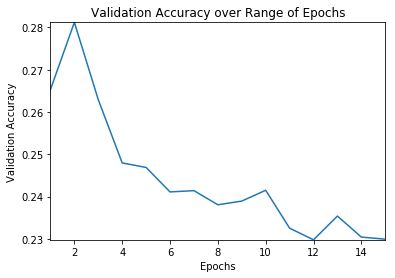

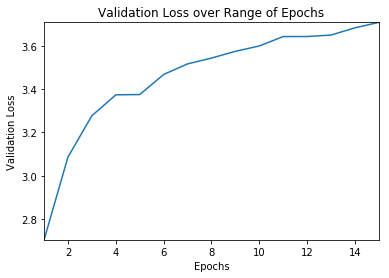

In [19]:
#Extract Accuracy and Loss from keras callback history
metrics = model2_dropout_metrics.history
val_accuracy = metrics['val_acc']
val_loss = metrics['val_loss']
epochs = numpy.arange(1, len(val_accuracy)+1)

#Plot Accuracy over Epochs
plt.clf()
plt.plot(epochs, val_accuracy)
plt.margins(0)
plt.title("Validation Accuracy over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Accuracy")
plt.show()

#Plot Loss over Epochs
plt.clf()
plt.plot(epochs, val_loss)
plt.margins(0)
plt.title("Validation Loss over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Loss")
plt.show()

##### Model 3 - Add Multiple Additional Layers for GRU with Dropout

In [ ]:
model3 = Sequential()
model3.add(Embedding(vocab_size, em_space, input_length=pad_length))
model3.add(GRU(em_space, dropout=0.1, recurrent_dropout=0.3, return_sequences=True))
model3.add(GRU(em_space, dropout=0.1, recurrent_dropout=0.3, return_sequences=True))
model3.add(GRU(em_space))
model3.add(Dense(24, activation='softmax'))

model3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model3_metrics = model3.fit(train_x, train_y, epochs=15, batch_size=1024, validation_data = (val_x, val_y))

Train on 278612 samples, validate on 69649 samples
Epoch 1/15
278612/278612 [==============================] - 246s 883us/step - loss: 2.3778 - acc: 0.2563 - val_loss: 3.1599 - val_acc: 0.1717
Epoch 2/15
278612/278612 [==============================] - 242s 868us/step - loss: 1.4708 - acc: 0.5941 - val_loss: 3.5891 - val_acc: 0.1784
Epoch 3/15
278612/278612 [==============================] - 242s 868us/step - loss: 1.1276 - acc: 0.7002 - val_loss: 3.6975 - val_acc: 0.1941
Epoch 4/15
278612/278612 [==============================] - 241s 865us/step - loss: 0.9259 - acc: 0.7593 - val_loss: 3.6467 - val_acc: 0.2056
Epoch 5/15
278612/278612 [==============================] - 241s 866us/step - loss: 0.8151 - acc: 0.7867 - val_loss: 3.6036 - val_acc: 0.2094
Epoch 6/15
278612/278612 [==============================] - 241s 866us/step - loss: 0.7443 - acc: 0.8016 - val_loss: 3.6017 - val_acc: 0.2083
Epoch 7/15
278612/278612 [==============================] - 242s 868us/step - loss: 0.6903 - acc:

In [ ]:
#Extract Accuracy and Loss from keras callback history
metrics = model3_rnn_metrics.history
val_accuracy = metrics['val_acc']
val_loss = metrics['val_loss']
epochs = numpy.arange(1, len(val_accuracy)+1)

#Plot Accuracy over Epochs
plt.clf()
plt.plot(epochs, val_accuracy)
plt.margins(0)
plt.title("Validation Accuracy over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Accuracy")
plt.show()

#Plot Loss over Epochs
plt.clf()
plt.plot(epochs, val_loss)
plt.margins(0)
plt.title("Validation Loss over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Loss")
plt.show()

##### Model 4  - GRU with Dropout

In [22]:
model4_dropout = Sequential()
model4_dropout.add(Embedding(vocab_size, 32, input_length=pad_length))
model4_dropout.add(GRU(32,dropout=0.1,recurrent_dropout=0.5))
model4_dropout.add(Dense(24, activation='softmax'))

model4_dropout.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

model4_dropout_metrics = model4_dropout.fit(train_x, train_y, epochs=15, batch_size=1024, validation_data = (val_x, val_y))

Train on 278612 samples, validate on 69649 samples
Epoch 1/15
278612/278612 [==============================] - 84s 303us/step - loss: 2.6169 - acc: 0.2116 - val_loss: 2.8025 - val_acc: 0.1856
Epoch 2/15
278612/278612 [==============================] - 83s 298us/step - loss: 1.7958 - acc: 0.4959 - val_loss: 2.9113 - val_acc: 0.2498
Epoch 3/15
278612/278612 [==============================] - 83s 297us/step - loss: 1.1935 - acc: 0.6917 - val_loss: 3.1260 - val_acc: 0.2510
Epoch 4/15
278612/278612 [==============================] - 83s 298us/step - loss: 0.8810 - acc: 0.7725 - val_loss: 3.3259 - val_acc: 0.2342
Epoch 5/15
278612/278612 [==============================] - 83s 297us/step - loss: 0.7396 - acc: 0.8030 - val_loss: 3.4074 - val_acc: 0.2286
Epoch 6/15
278612/278612 [==============================] - 83s 297us/step - loss: 0.6673 - acc: 0.8165 - val_loss: 3.5006 - val_acc: 0.2211
Epoch 7/15
278612/278612 [==============================] - 83s 297us/step - loss: 0.6246 - acc: 0.8256

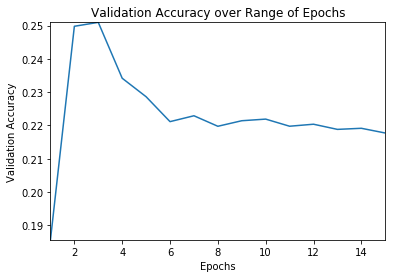

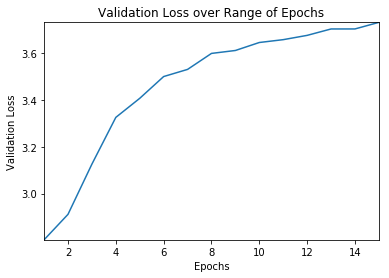

In [41]:
#Extract Accuracy and Loss from keras callback history
metrics = model4_dropout_metrics.history
val_accuracy = metrics['val_acc']
val_loss = metrics['val_loss']
epochs = numpy.arange(1, len(val_accuracy)+1)

#Plot Accuracy over Epochs
plt.clf()
plt.plot(epochs, val_accuracy)
plt.margins(0)
plt.title("Validation Accuracy over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Accuracy")
plt.show()

#Plot Loss over Epochs
plt.clf()
plt.plot(epochs, val_loss)
plt.margins(0)
plt.title("Validation Loss over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Loss")
plt.show()

##### Model 5 - Increase Number of Epochs (double it)

In [25]:
# Define the model
model5 = Sequential()
model5.add(Embedding(10000, em_space, input_length = 100))
model5.add(Flatten())
model5.add(Dense(24, activation='softmax'))

# Compile the model
model5.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

#Fit and Store Model Val
model5_metrics = model5.fit(train_x, train_y, epochs= 50, batch_size=1024,validation_data = (val_x, val_y))

Train on 278612 samples, validate on 69649 samples
Epoch 1/50
278612/278612 [==============================] - 8s 28us/step - loss: 2.1182 - acc: 0.4143 - val_loss: 2.3066 - val_acc: 0.3344
Epoch 2/50
278612/278612 [==============================] - 7s 25us/step - loss: 1.0032 - acc: 0.7458 - val_loss: 2.4040 - val_acc: 0.3170
Epoch 3/50
278612/278612 [==============================] - 7s 25us/step - loss: 0.7111 - acc: 0.8105 - val_loss: 2.5762 - val_acc: 0.2934
Epoch 4/50
278612/278612 [==============================] - 7s 25us/step - loss: 0.6133 - acc: 0.8326 - val_loss: 2.7130 - val_acc: 0.2804
Epoch 5/50
278612/278612 [==============================] - 7s 25us/step - loss: 0.5589 - acc: 0.8463 - val_loss: 2.8178 - val_acc: 0.2726
Epoch 6/50
278612/278612 [==============================] - 7s 25us/step - loss: 0.5212 - acc: 0.8558 - val_loss: 2.9060 - val_acc: 0.2651
Epoch 7/50
278612/278612 [==============================] - 7s 25us/step - loss: 0.4924 - acc: 0.8625 - val_loss: 2

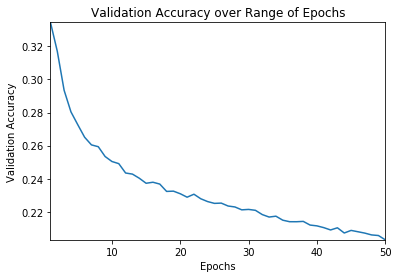

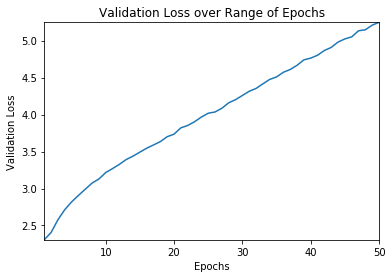

In [27]:
#Extract Accuracy and Loss from keras callback history
metrics = model5_metrics.history
val_accuracy = metrics['val_acc']
val_loss = metrics['val_loss']
epochs = numpy.arange(1, len(val_accuracy)+1)

#Plot Accuracy over Epochs
plt.clf()
plt.plot(epochs, val_accuracy)
plt.margins(0)
plt.title("Validation Accuracy over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Accuracy")
plt.show()

#Plot Loss over Epochs
plt.clf()
plt.plot(epochs, val_loss)
plt.margins(0)
plt.title("Validation Loss over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Loss")
plt.show()

### Final Model

#### Select Best Model

In [ ]:
#Find Best Estimate of Each Model

def best_estimate(metric_list):
    min_val = min(metric_list)
    best_iter = metric_list.index(min_val)
    return (min_val, best_iter + 1)

In [ ]:
#Model Loss
md1 = basic_metrics.history
md2 = rnn_metrics.history
md3 = rnn_lstm_metrics.history
md4 = rnn_gru_metrics.history
md5 = model_dropout.history
md6 = model2_dropout.history
md7 = model3_rnn.history
md8 = model4_dropout.history
md9 = model5.history

In [ ]:
md1_loss = md1['val_loss']
md2_loss = md2['val_loss']
md3_loss = md3['val_loss']
md4_loss = md4['val_loss']
md5_loss = md5['val_loss']
md6_loss = md6['val_loss']
md7_loss = md7['val_loss']
md8_loss = md8['val_loss']
md9_loss = md9['val_loss']

In [ ]:
(md1_min, md1_best) = best_estimate(md1_loss)
(md2_min, md2_best) = best_estimate(md2_loss)
(md3_min, md3_best) = best_estimate(md3_loss)
(md4_min, md4_best) = best_estimate(md4_loss)
(md5_min, md5_best) = best_estimate(md5_loss)
(md6_min, md6_best) = best_estimate(md6_loss)
(md7_min, md7_best) = best_estimate(md7_loss)
(md8_min, md8_best) = best_estimate(md8_loss)
(md9_min, md9_best) = best_estimate(md9_loss)

print(md1_min, md2_min, md3_min, md4_min, md5_min, md6_min, md7_min, md8_min, md9_min)

The best model is 

In [ ]:
model_final.evaluate(test_x, test_y)

Comment: 